In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from math import sqrt

In [34]:
walmart = pd.read_csv("/content/sample_data/Womens Clothing E-Commerce Reviews.csv.zip")
walmart

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


## **Preprocessing**

In [35]:
walmart.drop(columns=['Title', 'Review Text', 'Division Name','Unnamed: 0'], inplace=True)

In [36]:
walmart

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Department Name,Class Name
0,767,33,4,1,0,Intimate,Intimates
1,1080,34,5,1,4,Dresses,Dresses
2,1077,60,3,0,0,Dresses,Dresses
3,1049,50,5,1,0,Bottoms,Pants
4,847,47,5,1,6,Tops,Blouses
...,...,...,...,...,...,...,...
23481,1104,34,5,1,0,Dresses,Dresses
23482,862,48,3,1,0,Tops,Knits
23483,1104,31,3,0,1,Dresses,Dresses
23484,1084,28,3,1,2,Dresses,Dresses


In [37]:
print(walmart.isnull().sum())

Clothing ID                 0
Age                         0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Department Name            14
Class Name                 14
dtype: int64


In [38]:
walmart.dropna(subset=['Department Name', 'Class Name'], inplace=True)
print(walmart.isnull().sum()) #no missing values now

Clothing ID                0
Age                        0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Department Name            0
Class Name                 0
dtype: int64


In [39]:
print(walmart['Department Name'].unique())
print(walmart['Class Name'].unique())

['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend']
['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


In [40]:
le = LabelEncoder()

walmart['Department Name'] = le.fit_transform(walmart['Department Name'])
walmart['Class Name'] = le.fit_transform(walmart['Class Name'])

In [41]:
walmart

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Department Name,Class Name
0,767,33,4,1,0,2,5
1,1080,34,5,1,4,1,3
2,1077,60,3,0,0,1,3
3,1049,50,5,1,0,0,13
4,847,47,5,1,6,4,0
...,...,...,...,...,...,...,...
23481,1104,34,5,1,0,1,3
23482,862,48,3,1,0,4,8
23483,1104,31,3,0,1,1,3
23484,1084,28,3,1,2,1,3


## **Visualizing Data**

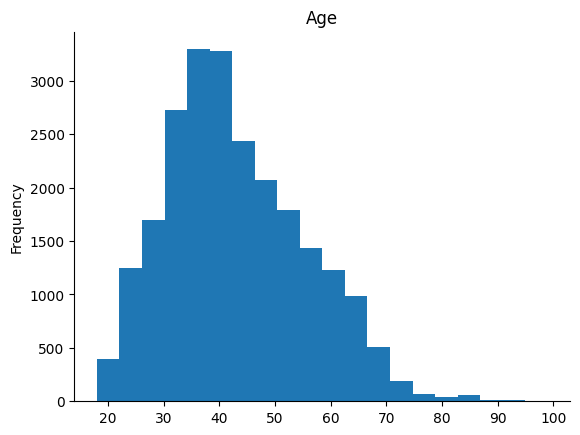

In [42]:
from matplotlib import pyplot as plt
walmart['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

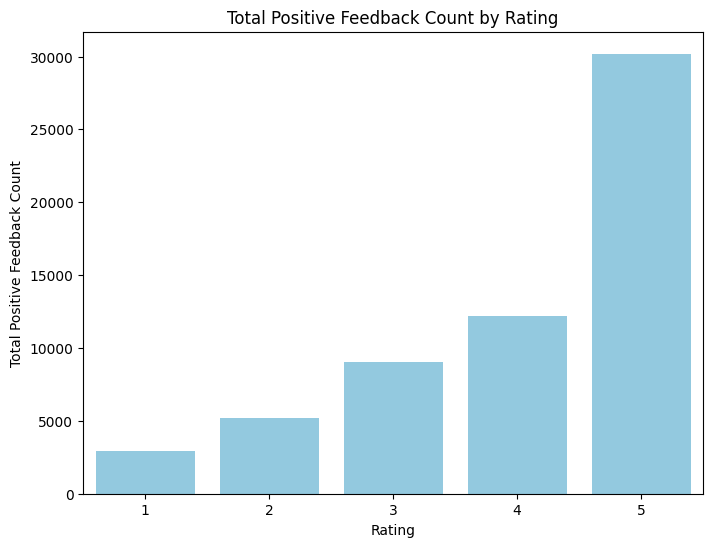

In [43]:
rating_feedback = walmart.groupby('Rating')['Positive Feedback Count'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=rating_feedback, x='Rating', y='Positive Feedback Count', color='skyblue')
plt.title('Total Positive Feedback Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Total Positive Feedback Count')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

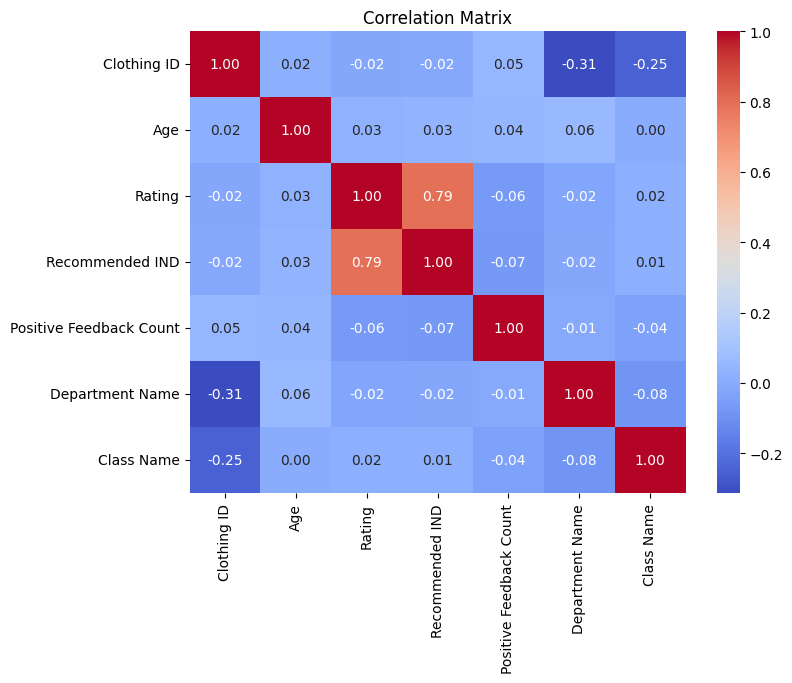

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(walmart.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

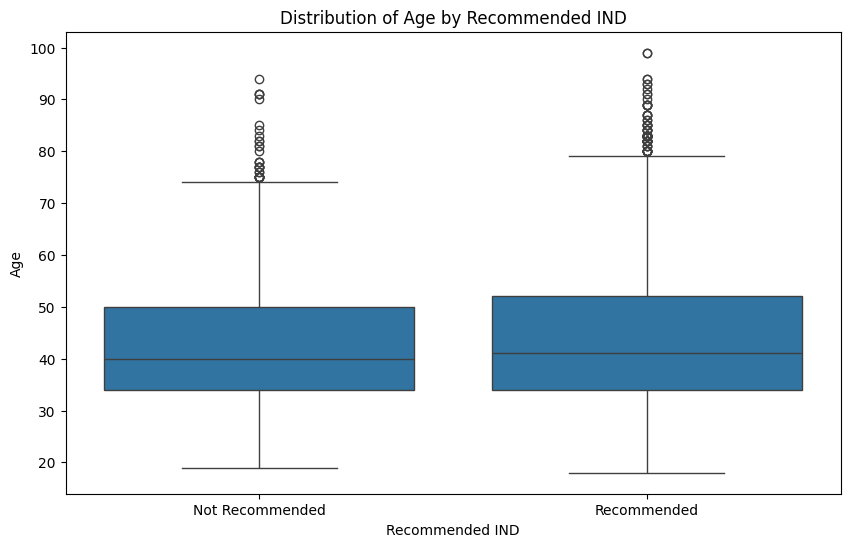

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=walmart, x='Recommended IND', y='Age')
plt.title('Distribution of Age by Recommended IND')
plt.xlabel('Recommended IND')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Recommended', 'Recommended'])
plt.show()

## **Classification**

**Classification - Logistic Regression**

In [46]:
X = walmart[['Age', 'Rating', 'Department Name', 'Class Name']]
Y = walmart['Recommended IND']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [52]:
Y_pred = model.predict(X_test)
Y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [53]:
print("Confusion Matrix \n", confusion_matrix(Y_test, Y_pred))

Confusion Matrix 
 [[ 798   65]
 [ 248 3584]]


In [54]:
lr_accuracy = (798 + 3584) / ( 65 + 248 + 798 + 3584)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9333333333333333


**Classification - KNeighbors**

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
model_1 = KNeighborsClassifier()
model_1.fit(X_train, Y_train)

KNeighborsClassifier()

In [57]:
Y_pred_knn = model_1.predict(X_test)
Y_pred_knn

array([1, 1, 1, ..., 0, 1, 1])

In [58]:
print("Confusion Matrix \n", confusion_matrix(Y_test, Y_pred_knn))

Confusion Matrix 
 [[ 665  198]
 [ 160 3672]]


In [59]:
knn_accuracy = (665 + 3672) / (665 + 160 + 198 + 3672)
print("KNeighbors Accuracy:", knn_accuracy)

KNeighbors Accuracy: 0.9237486687965921


**Classification - SVM**

In [60]:
from sklearn.svm import SVC

In [61]:
model_3 = SVC()
model_3.fit(X_train, Y_train)

SVC()

In [62]:
Y_pred_svm = model_3.predict(X_test)
Y_pred_svm

array([1, 1, 1, ..., 0, 1, 0])

In [63]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_svm))

Confusion Matrix:
 [[ 732  131]
 [ 190 3642]]


In [64]:
svm_accuracy = (732 + 3642) / (732 + 190 + 131 + 3642)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.931629392971246


**Classification - RandomForest**

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [67]:
Y_pred_rf = rf.predict(X_test)

In [77]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_rf))

Confusion Matrix:
 [[ 698  165]
 [ 187 3645]]


In [78]:
rf_accuracy = (698 + 3645) / (698 + 187 + 165 + 3645)
print("RandomForest Accuracy:", rf_accuracy)

RandomForest Accuracy: 0.9250266240681576


**Classification - Decision Tree**

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [72]:
Y_pred_dt = dt.predict(X_test)

In [73]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_dt))

Confusion Matrix:
 [[ 713  150]
 [ 204 3628]]


In [76]:
dt_accuracy = (713 + 3628) / (713 + 204 + 150 + 3628)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9246006389776358


**Classification Model Accuracies**

In [80]:
print("Logistic Regression Accuracy:", lr_accuracy)
print("KNeighbors Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("RandomForest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

Logistic Regression Accuracy: 0.9333333333333333
KNeighbors Accuracy: 0.9237486687965921
SVM Accuracy: 0.931629392971246
RandomForest Accuracy: 0.9250266240681576
Decision Tree Accuracy: 0.9246006389776358


## **Regression**

**Regression - Linear Regression**

In [81]:
X = walmart[['Age', 'Rating', 'Department Name', 'Class Name']]
Y = walmart['Positive Feedback Count']

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [83]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [84]:
Y_pred_linr = model.predict(X_test)

In [88]:
mse_linr = mean_squared_error(Y_test, Y_pred_linr)
rmse_linr = sqrt(mse_linr)

print("Mean Squared Error for Linear Regression:", mse_linr)
print("Root Mean Squared Error for Linear Regression:", rmse_linr)


Mean Squared Error for Linear Regression: 32.21777197609242
Root Mean Squared Error for Linear Regression: 5.676070117263565


**Regression - KNN Regression**


In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
model_2 = KNeighborsRegressor()
model_2.fit(X_train, Y_train)

KNeighborsRegressor()

In [92]:
Y_pred_knn = model_2.predict(X_test)

In [93]:
mse_knn = mean_squared_error(Y_test, Y_pred_knn)
rmse_knn = sqrt(mse_knn)

print("Mean Squared Error for KNN Regression:", mse_knn)
print("Root Mean Squared Error for KNN Regression:", rmse_knn)

Mean Squared Error for KNN Regression: 35.87002342917998
Root Mean Squared Error for KNN Regression: 5.989158824841764


**Regression - RandomForest Regressor**

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
model_3 = RandomForestRegressor()
model_3.fit(X_train, Y_train)

RandomForestRegressor()

In [96]:
Y_pred_rf = model_3.predict(X_test)

In [97]:
mse_rf = mean_squared_error(Y_test, Y_pred_rf)
rmse_rf = sqrt(mse_rf)

print("Mean Squared Error for RandomForest Regressor:", mse_rf)
print("Root Mean Squared Error for RandomForest Regressor:", rmse_rf)

Mean Squared Error for RandomForest Regressor: 35.00062951394416
Root Mean Squared Error for RandomForest Regressor: 5.9161329864992185


**Regression - DecisionTree Regressor**

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
model_4 = DecisionTreeRegressor()
model_4.fit(X_train, Y_train)

DecisionTreeRegressor()

In [100]:
Y_pred_dt = model_4.predict(X_test)

In [101]:
mse_dt = mean_squared_error(Y_test, Y_pred_dt)
rmse_dt = sqrt(mse_dt)

print("Mean Squared Error for Decision Tree Regressor:", mse_dt)
print("Root Mean Squared Error for Decision Tree Regressor:", rmse_dt)

Mean Squared Error for Decision Tree Regressor: 37.61031009169881
Root Mean Squared Error for Decision Tree Regressor: 6.132724524360996


**Regression Analysis**

In [102]:
print("Mean Squared Error for Linear Regression:", mse_linr)
print("Root Mean Squared Error for Linear Regression:", rmse_linr)

print("Mean Squared Error for KNN Regression:", mse_knn)
print("Root Mean Squared Error for KNN Regression:", rmse_knn)

print("Mean Squared Error for RandomForest Regression:", mse_rf)
print("Root Mean Squared Error for RandomForest Regression:", rmse_rf)

print("Mean Squared Error for Decision Tree Regression:", mse_dt)
print("Root Mean Squared Error for Decision Tree Regression:", rmse_dt)

Mean Squared Error for Linear Regression: 32.21777197609242
Root Mean Squared Error for Linear Regression: 5.676070117263565
Mean Squared Error for KNN Regression: 35.87002342917998
Root Mean Squared Error for KNN Regression: 5.989158824841764
Mean Squared Error for RandomForest Regression: 35.00062951394416
Root Mean Squared Error for RandomForest Regression: 5.9161329864992185
Mean Squared Error for Decision Tree Regression: 37.61031009169881
Root Mean Squared Error for Decision Tree Regression: 6.132724524360996
